# <b> KAGGLE : HIGGS BOSON MACHINE LEARNING CHALLENGE

#### <b> DESCRIPTION: 
- The Higgs Boson particle was discovered in 2013. A key property of any particle is how often it decays into other particles. ATLAS is a particle physics experiment taking place at the Large Hadron Collider at CERN that searches for new particles and processes using head-on collisions of protons of extraordinarily high energy. The ATLAS experiment has recently observed a signal of the Higgs boson decaying into two tau particles, but this decay is a small signal buried in background noise. 

- The goal of the project is to improve the procedure that produces the selection region. We provide a training set with signal/background labels and with weights, a test set (without labels and weights), and a formal objective representing an approximation of the median significance (AMS) of the counting test. 

___________________

### <b> PROJECT OBJECTIVE :
- The objective of the project is to classify an event produced in the particle accelerator as background or signal. As described in the report of the dataset on Kaggle, a background event is explained by the existing theories and previous observations. A signal event, however, indicates a process that cannot be described by previous observations and leads to the potential discovery of a new particle.


### <b> DATASET CHARACTERISTICS:

    The dataset from Kaggle has 800000 events (195.5 MB in total):

    * Training set of 250000 events
    * Test set of 550000 events

    Training set has 30 feature columns, a weight column and a label column. Test set has 30 feature columns and a label column.

#### <b>OUTLINE OF THIS PROJECT : 

This project has the following flow:

* Preprocessing and Cleaning of the data 
* Base Model: 
* Ensemble Models: 
* Experimentation: 
* Interpretation: 
* Post modeling, interpret your results. 
* Conclusions: 
_____________________________

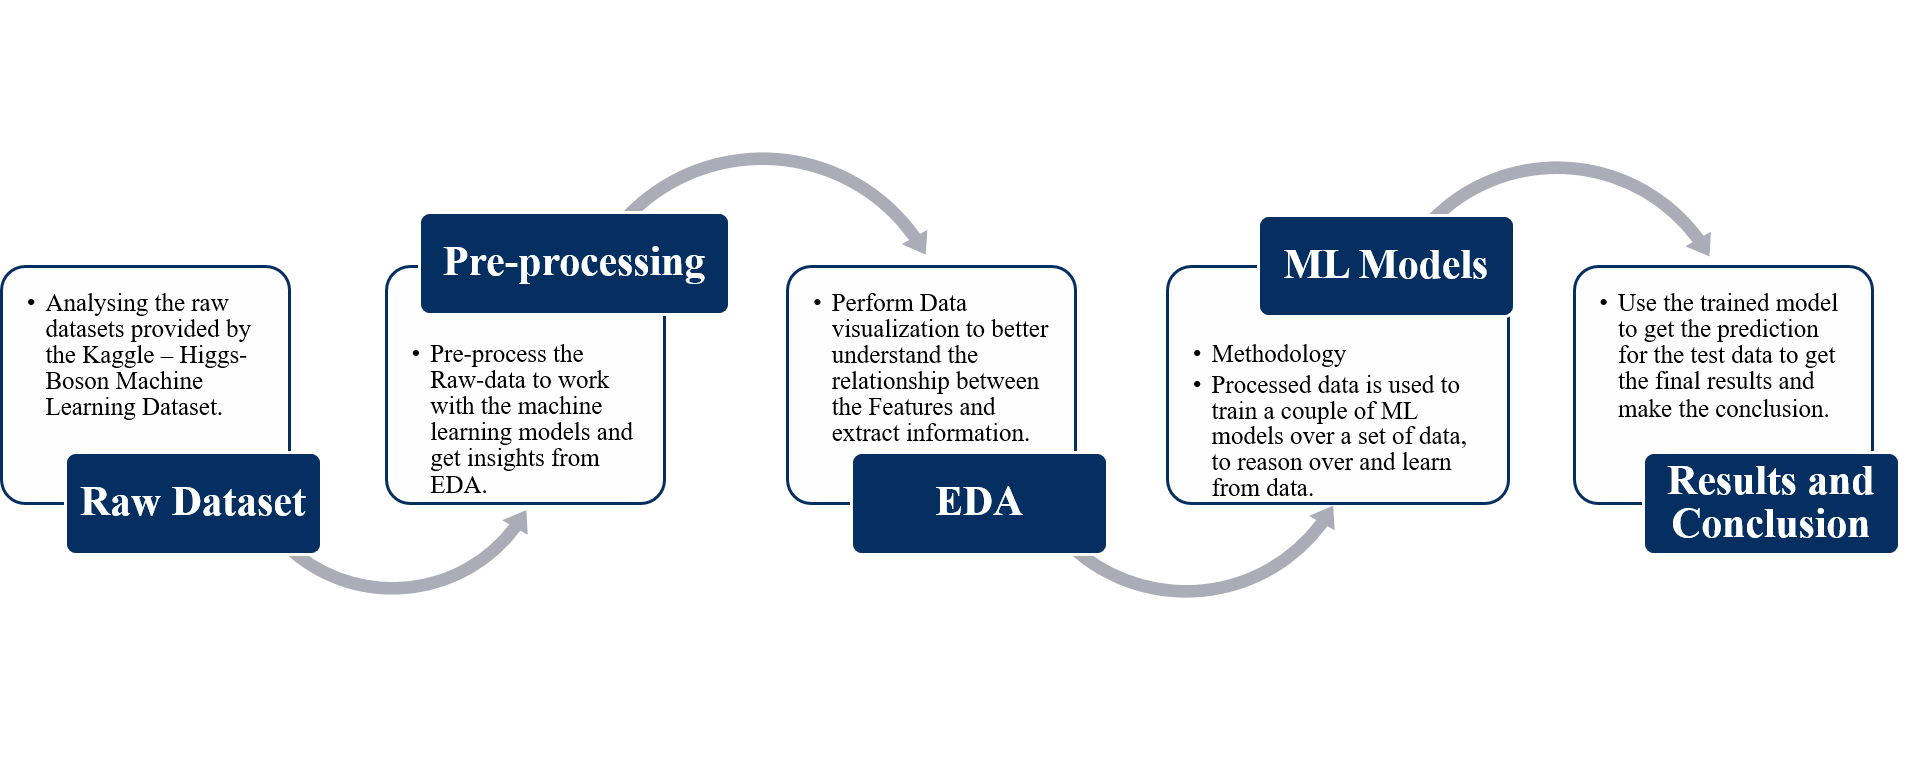

# <b> IMPORTING LIBRARIES

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

import warnings


### <b> LODING THE DATASET:

In [2]:
df_train = pd.read_csv('training.csv')
print(f"Training dataset \nRows :{df_train.shape[0]} ; Columns :{df_train.shape[1]}")
df_train.head()

Training dataset 
Rows :250000 ; Columns :33


EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

### <b> LODING THE DATASET:

In [3]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')

print (f'''
 - TRAINING DATASET SHAPE : {df_train.shape} , (consisting extra feature : Weight and Label)
 - TESTING DATASET SHAPE  : {df_test.shape}
''')

df_train.head()


 - TRAINING DATASET SHAPE : (250000, 33) , (consisting extra feature : Weight and Label)
 - TESTING DATASET SHAPE  : (550000, 31)



EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [4]:
df_test.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   350000      -999.000                       79.589        23.916     3.036   
1   350001       106.398                       67.490        87.949    49.994   
2   350002       117.794                       56.226        96.358     4.137   
3   350003       135.861                       30.604        97.288     9.104   
4   350004        74.159                       82.772        58.731    89.646   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0              -999.000          -999.000             -999.000   
1              -999.000          -999.000             -999.000   
2              -999.000          -999.000             -999.000   
3              -999.000          -999.000             -999.000   
4                 1.347           536.663               -0.339   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_met_phi  PRI_met_sumet  \
0               0.903       3.036  ...        2.022         98.556   
1               2.048       2.679  ...       -1.138        176.251   
2               2.755       4.137  ...       -1.868        111.505   
3               2.811       9.104  ...        1.172        164.707   
4               1.028      77.213  ...       -0.231        869.614   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            0            -999.000             -999.000             -999.000   
1            1              47.575               -0.553               -0.849   
2            0            -999.000             -999.000             -999.000   
3            0            -999.000             -999.000             -999.000   
4            3             254.085               -1.013               -0.334   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0               -999.000                -999.000                -999.000   
1               -999.000                -999.000                -999.000   
2               -999.000                -999.000                -999.000   
3               -999.000                -999.000                -999.000   
4                185.857                   0.335                   2.587   

   PRI_jet_all_pt  
0          -0.000  
1          47.575  
2           0.000  
3           0.000  
4         599.213  

[5 rows x 31 columns]

## <b> PREPROCESSING

In [5]:
# Removing columns which are not important for the modeling of the ML algorithm.
df_train = df_train.drop(['EventId', 'Weight'], axis = 1)
df_test = df_test.drop('EventId', axis  =1 )

print (df_train.shape, df_test.shape)


(250000, 31) (550000, 30)


In [7]:
# Displaying train dataset characteristics
print('Class distribution of the training set is:')
ipd.display(df_train['Label'].value_counts())
print('The label s = signal of Higgs Boson and b = background\n')
ipd.display(df_train.describe())

Class distribution of the training set is:


b    164333
s     85667
Name: Label, dtype: int64

The label s = signal of Higgs Boson and b = background



DER_mass_MMC  DER_mass_transverse_met_lep   DER_mass_vis  \
count  250000.000000                250000.000000  250000.000000   
mean      -49.023079                    49.239819      81.181982   
std       406.345647                    35.344886      40.828691   
min      -999.000000                     0.000000       6.329000   
25%        78.100750                    19.241000      59.388750   
50%       105.012000                    46.524000      73.752000   
75%       130.606250                    73.598000      92.259000   
max      1192.026000                   690.075000    1349.351000   

            DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000         250000.000000     250000.000000   
mean       57.895962           -708.420675       -601.237051   
std        63.655682            454.480565        657.972302   
min         0.000000           -999.000000       -999.000000   
25%        14.068750           -999.000000       -999.000000   
50%        38.467500           -999.000000       -999.000000   
75%        79.169000              0.490000         83.446000   
max      2834.999000              8.503000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot     DER_sum_pt  \
count        250000.000000       250000.000000  250000.000000  250000.000000   
mean           -709.356603            2.373100      18.917332     158.432217   
std             453.019877            0.782911      22.273494     115.706115   
min            -999.000000            0.208000       0.000000      46.104000   
25%            -999.000000            1.810000       2.841000      77.550000   
50%            -999.000000            2.491500      12.315500     120.664500   
75%              -4.593000            2.961000      27.591000     200.478250   
max              16.690000            5.684000    2834.999000    1852.462000   

       ...  PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  \
count  ...  250000.000000  250000.000000       250000.000000   
mean   ...     209.797178       0.979176         -348.329567   
std    ...     126.499506       0.977426          532.962789   
min    ...      13.678000       0.000000         -999.000000   
25%    ...     123.017500       0.000000         -999.000000   
50%    ...     179.739000       1.000000           38.960000   
75%    ...     263.379250       2.000000           75.349000   
max    ...    2003.976000       3.000000         1120.573000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count        250000.000000        250000.000000          250000.000000   
mean           -399.254314          -399.259788            -692.381204   
std             489.338286           489.333883             479.875496   
min            -999.000000          -999.000000            -999.000000   
25%            -999.000000          -999.000000            -999.000000   
50%              -1.872000            -2.093000            -999.000000   
75%               0.433000             0.503000              33.703000   
max               4.499000             3.141000             721.456000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  \
count           250000.000000           250000.000000   250000.000000   
mean              -709.121609             -709.118631       73.064591   
std                453.384624              453.389017       98.015662   
min               -999.000000             -999.000000        0.000000   
25%               -999.000000             -999.000000       -0.000000   
50%               -999.000000             -999.000000       40.512500   
75%                 -2.457000               -2.275000      109.933750   
max                  4.500000                3.142000     1633.433000   

              Weight  
count  250000.000000  
mean        1.646767  
std         1.875103  
min         0.001502  
25%         0.018636  
50%         1.156188  
75%         2.404128  
max        

The class distribution of the training set is

* b (background) : 164333 events (66%)
* s (Higgs to tau tau): 85667 (34%)

In [6]:
# Doing the ordinal encoding on Label of Train and Random submission dataset: 
# Perfprming ordinal Encoding 
# Label : b =0, s = 1

ord_En = OrdinalEncoder()

ord_Label = ord_En.fit_transform(df_train[['Label']])

df_train['Label'] = ord_Label

In [7]:
# SneakPeek to the Train dataset: 
df_train.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0               3.064      41.928     197.760  ...        258.733   
1               3.473       2.078     125.157  ...        164.546   
2               3.148       9.336     197.814  ...        260.414   
3               3.310       0.414      75.968  ...         86.062   
4               3.891      16.405      57.983  ...         53.131   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2              67.435                2.150                0.444   
1            1              46.226                0.725                1.158   
2            1              44.251                2.053               -2.028   
3            0            -999.000             -999.000             -999.000   
4            0            -999.000             -999.000             -999.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1               -999.000                 -999.00                -999.000   
2               -999.000                 -999.00                -999.000   
3               -999.000                 -999.00                -999.000   
4               -999.000                 -999.00                -999.000   

   PRI_jet_all_pt  Label  
0         113.497    1.0  
1          46.226    0.0  
2          44.251    0.0  
3          -0.000    0.0  
4           0.000    0.0  

[5 rows x 31 columns]

In [8]:
# SneakPeek to the Test dataset: 
df_test.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0      -999.000                       79.589        23.916     3.036   
1       106.398                       67.490        87.949    49.994   
2       117.794                       56.226        96.358     4.137   
3       135.861                       30.604        97.288     9.104   
4        74.159                       82.772        58.731    89.646   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0              -999.000          -999.000             -999.000   
1              -999.000          -999.000             -999.000   
2              -999.000          -999.000             -999.000   
3              -999.000          -999.000             -999.000   
4                 1.347           536.663               -0.339   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_phi  \
0               0.903       3.036      56.018  ...        2.022   
1               2.048       2.679     132.865  ...       -1.138   
2               2.755       4.137      97.600  ...       -1.868   
3               2.811       9.104      94.112  ...        1.172   
4               1.028      77.213     721.552  ...       -0.231   

   PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0         98.556            0            -999.000             -999.000   
1        176.251            1              47.575               -0.553   
2        111.505            0            -999.000             -999.000   
3        164.707            0            -999.000             -999.000   
4        869.614            3             254.085               -1.013   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0             -999.000               -999.000                -999.000   
1               -0.849               -999.000                -999.000   
2             -999.000               -999.000                -999.000   
3             -999.000               -999.000                -999.000   
4               -0.334                185.857                   0.335   

   PRI_jet_subleading_phi  PRI_jet_all_pt  
0                -999.000          -0.000  
1                -999.000          47.575  
2                -999.000           0.000  
3                -999.000           0.000  
4                   2.587         599.213  

[5 rows x 30 columns]

### Missing Values
-990.0 values represent entries that have no meaning/that could not be calculated. The table below shows the the percentage of those missing values per column.

We can see than there are a lot of missing values: 72% of rows contain at least one missing value and of some columns have up to 71% of them. So it is not viable to delete rows or columns, otherwise it will throw away too much data. Moreover the fact that a variable has no meaning or couldn't be calculated might be correlated with the label.

<b> Getting rid of all -999 values from both of the dataset and replacing them with NaN:

In [9]:
# Getting rid of all -999 values and replce with 'Nan'
df_train = df_train.replace(-999, np.nan)
df_test = df_test.replace(-999.000, np.nan)

# Printing information about percentage of missing values in the training dataset
perc_nans = df_train.isna().sum() * 100 / len(df_train)
perc_rows_nans = (len(df_train) - len(df_train.dropna()))*100/(len(df_train))
print("Percentage of rows containing at least one missing value:", perc_rows_nans)
print('\nTable of column name and percentage missing values')
print(perc_nans)


Percentage of rows containing at least one missing value: 72.7544

Table of column name and percentage missing values
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num             

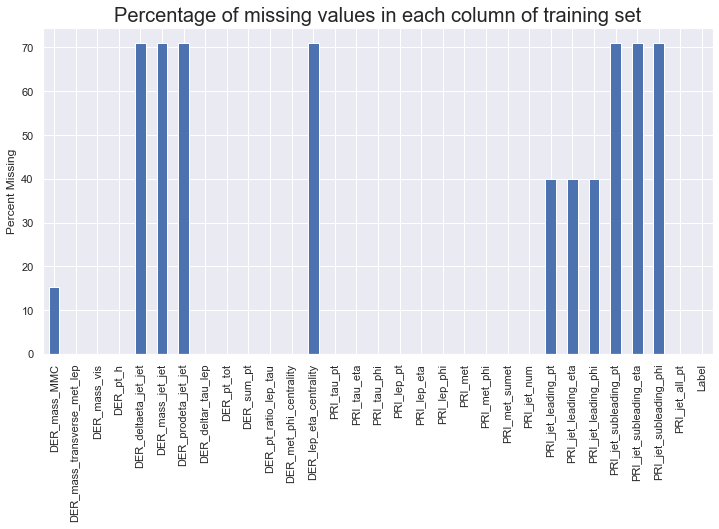

In [10]:
# Plotting the above observation
plt.figure(figsize=(12,6))
perc_nans.plot.bar()
plt.title('Percentage of missing values in each column of training set', fontsize = 20)
plt.ylabel('Percent Missing')
plt.show()

**Dealing with the missing values using fill-forward**

In [11]:
# Replacing all nan values with fill forward method 
df_train = df_train.fillna(method= 'ffill')
df_test = df_test.fillna(method= 'bfill')

print("Now, we dont have any 'nan' values in any of the dataset")

Now, we dont have any 'nan' values in any of the dataset


In [12]:
# Lets normalize the whole dataset except for the Weight , LAbel columns:
from sklearn.preprocessing import MinMaxScaler
column = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

df_train[column] = MinMaxScaler().fit_transform(np.array(df_train[column]))
df_test[column] = MinMaxScaler().fit_transform(np.array(df_test[column]))

<b> NOW, we don't have any negative or nan values in our dataset

In [13]:
df_train = round(df_train,2)
df_test = round(df_test,2)

In [14]:
# To check if normalization works or not
print("Pre-Processed Data")
df_train.head()

Pre-Processed Data


DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0          0.11                         0.07          0.07      0.01   
1          0.13                         0.10          0.07      0.02   
2          0.13                         0.24          0.09      0.01   
3          0.11                         0.12          0.06      0.00   
4          0.14                         0.02          0.10      0.01   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.11              0.02                  0.6   
1                  0.11              0.02                  0.6   
2                  0.11              0.02                  0.6   
3                  0.11              0.02                  0.6   
4                  0.11              0.02                  0.6   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0                0.52        0.01        0.08  ...           0.12   
1                0.60        0.00        0.04  ...           0.08   
2                0.54        0.00        0.08  ...           0.12   
3                0.57        0.00        0.02  ...           0.04   
4                0.67        0.01        0.01  ...           0.02   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2                0.03                 0.74                 0.57   
1            1                0.01                 0.58                 0.68   
2            1                0.01                 0.73                 0.18   
3            0                0.01                 0.73                 0.18   
4            0                0.01                 0.73                 0.18   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                   0.02                    0.64                    0.11   
1                   0.02                    0.64                    0.11   
2                   0.02                    0.64                    0.11   
3                   0.02                    0.64                    0.11   
4                   0.02                    0.64                    0.11   

   PRI_jet_all_pt  Label  
0            0.07    1.0  
1            0.03    0.0  
2            0.03    0.0  
3            0.00    0.0  
4            0.00    0.0  

[5 rows x 31 columns]

In [15]:
df_test.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0          0.05                         0.08          0.01      0.00   
1          0.05                         0.07          0.06      0.04   
2          0.06                         0.06          0.07      0.00   
3          0.07                         0.03          0.07      0.01   
4          0.03                         0.09          0.04      0.07   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.15              0.11                 0.51   
1                  0.15              0.11                 0.51   
2                  0.15              0.11                 0.51   
3                  0.15              0.11                 0.51   
4                  0.15              0.11                 0.51   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_phi  \
0                0.12        0.00        0.00  ...         0.82   
1                0.33        0.00        0.04  ...         0.32   
2                0.46        0.01        0.03  ...         0.20   
3                0.47        0.01        0.02  ...         0.69   
4                0.14        0.10        0.33  ...         0.46   

   PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0           0.04            0                0.02                 0.44   
1           0.07            1                0.02                 0.44   
2           0.04            0                0.20                 0.39   
3           0.07            0                0.20                 0.39   
4           0.39            3                0.20                 0.39   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                 0.36                    0.2                    0.54   
1                 0.36                    0.2                    0.54   
2                 0.45                    0.2                    0.54   
3                 0.45                    0.2                    0.54   
4                 0.45                    0.2                    0.54   

   PRI_jet_subleading_phi  PRI_jet_all_pt  
0                    0.91            0.00  
1                    0.91            0.03  
2                    0.91            0.00  
3                    0.91            0.00  
4                    0.91            0.32  

[5 rows x 30 columns]

In [16]:
# Statistical description of numerical variables in the test set
df_train.describe()


DER_mass_MMC  DER_mass_transverse_met_lep   DER_mass_vis  \
count  250000.000000                250000.000000  250000.000000   
mean        0.095331                     0.071315       0.055744   
std         0.048489                     0.051360       0.030540   
min         0.000000                     0.000000       0.000000   
25%         0.070000                     0.030000       0.040000   
50%         0.090000                     0.070000       0.050000   
75%         0.110000                     0.110000       0.060000   
max         1.000000                     1.000000       1.000000   

            DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000         250000.000000     250000.000000   
mean        0.020232              0.282501          0.071971   
std         0.022766              0.204768          0.079975   
min         0.000000              0.000000          0.000000   
25%         0.000000              0.100000          0.020000   
50%         0.010000              0.250000          0.040000   
75%         0.030000              0.430000          0.090000   
max         1.000000              1.000000          1.000000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot     DER_sum_pt  \
count        250000.000000       250000.000000  250000.000000  250000.000000   
mean              0.496236            0.395370       0.006363       0.062179   
std               0.103219            0.142998       0.008501       0.064118   
min               0.000000            0.000000       0.000000       0.000000   
25%               0.440000            0.290000       0.000000       0.020000   
50%               0.510000            0.420000       0.000000       0.040000   
75%               0.550000            0.500000       0.010000       0.090000   
max               1.000000            1.000000       1.000000       1.000000   

       ...  PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  \
count  ...  250000.000000  250000.000000       250000.000000   
mean   ...       0.098532       0.979176            0.049900   
std    ...       0.063612       0.977426            0.055516   
min    ...       0.000000       0.000000            0.000000   
25%    ...       0.050000       0.000000            0.010000   
50%    ...       0.080000       1.000000            0.030000   
75%    ...       0.130000       2.000000            0.070000   
max    ...       1.000000       3.000000            1.000000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count        250000.000000        250000.000000          250000.000000   
mean              0.499645             0.497887               0.039835   
std               0.198067             0.288763               0.046420   
min               0.000000             0.000000               0.000000   
25%               0.350000             0.250000               0.010000   
50%               0.500000             0.490000               0.030000   
75%               0.650000             0.750000               0.050000   
max               1.000000             1.000000               1.000000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  \
count           250000.000000           250000.000000   250000.000000   
mean                 0.498920                0.500296        0.044682   
std                  0.225511                0.288745        0.060066   
min                  0.000000                0.000000        0.000000   
25%                  0.320000                0.250000        0.000000   
50%                  0.500000                0.500000        0.020000   
75%                  0.680000                0.750000        0.070000   
max                  1.000000                1.000000        1.000000   

               Label  
count  250000.000000  
mean        0.342668  
std         0.474603  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max        

# <b> Performing Exploratory Data Analysis (EDA):

<b> Creating a new train and test dataset, so it will not interfere with our Original Dataset:

Note: the weight column is generated by the simulation program that generated this dataset and thus can not be used as a predictor.

In [19]:
# Droping the Weight Column, as we don't have the weight column in TEST DATASET.
df_train_new = df_train.drop("Weight",axis =1)
df_train_new.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0          0.11                         0.07          0.07      0.01   
1          0.13                         0.10          0.07      0.02   
2          0.13                         0.24          0.09      0.01   
3          0.11                         0.12          0.06      0.00   
4          0.14                         0.02          0.10      0.01   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.11              0.02                  0.6   
1                  0.11              0.02                  0.6   
2                  0.11              0.02                  0.6   
3                  0.11              0.02                  0.6   
4                  0.11              0.02                  0.6   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0                0.52        0.01        0.08  ...           0.12   
1                0.60        0.00        0.04  ...           0.08   
2                0.54        0.00        0.08  ...           0.12   
3                0.57        0.00        0.02  ...           0.04   
4                0.67        0.01        0.01  ...           0.02   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2                0.03                 0.74                 0.57   
1            1                0.01                 0.58                 0.68   
2            1                0.01                 0.73                 0.18   
3            0                0.01                 0.73                 0.18   
4            0                0.01                 0.73                 0.18   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                   0.02                    0.64                    0.11   
1                   0.02                    0.64                    0.11   
2                   0.02                    0.64                    0.11   
3                   0.02                    0.64                    0.11   
4                   0.02                    0.64                    0.11   

   PRI_jet_all_pt  Label  
0            0.07    1.0  
1            0.03    0.0  
2            0.03    0.0  
3            0.00    0.0  
4            0.00    0.0  

[5 rows x 31 columns]

To get a better understanding of the features' distributions we plot the histograms for each feature.

Some variables seem to follow well known probability distributions:

* Gaussian (ex. PRI_tau_eta, PRI_lep_eta)
* Beta distribution with one parameter alpha (U distribution) (DER_lep_eta_centrality, DER_met_phi_centrality)
* Uniform distributions (ex. PRI_tau_phi, PRI_met_phi)
* Exponential distributions (ex. DER_sum_pt, PRI_jet_leading_pt)

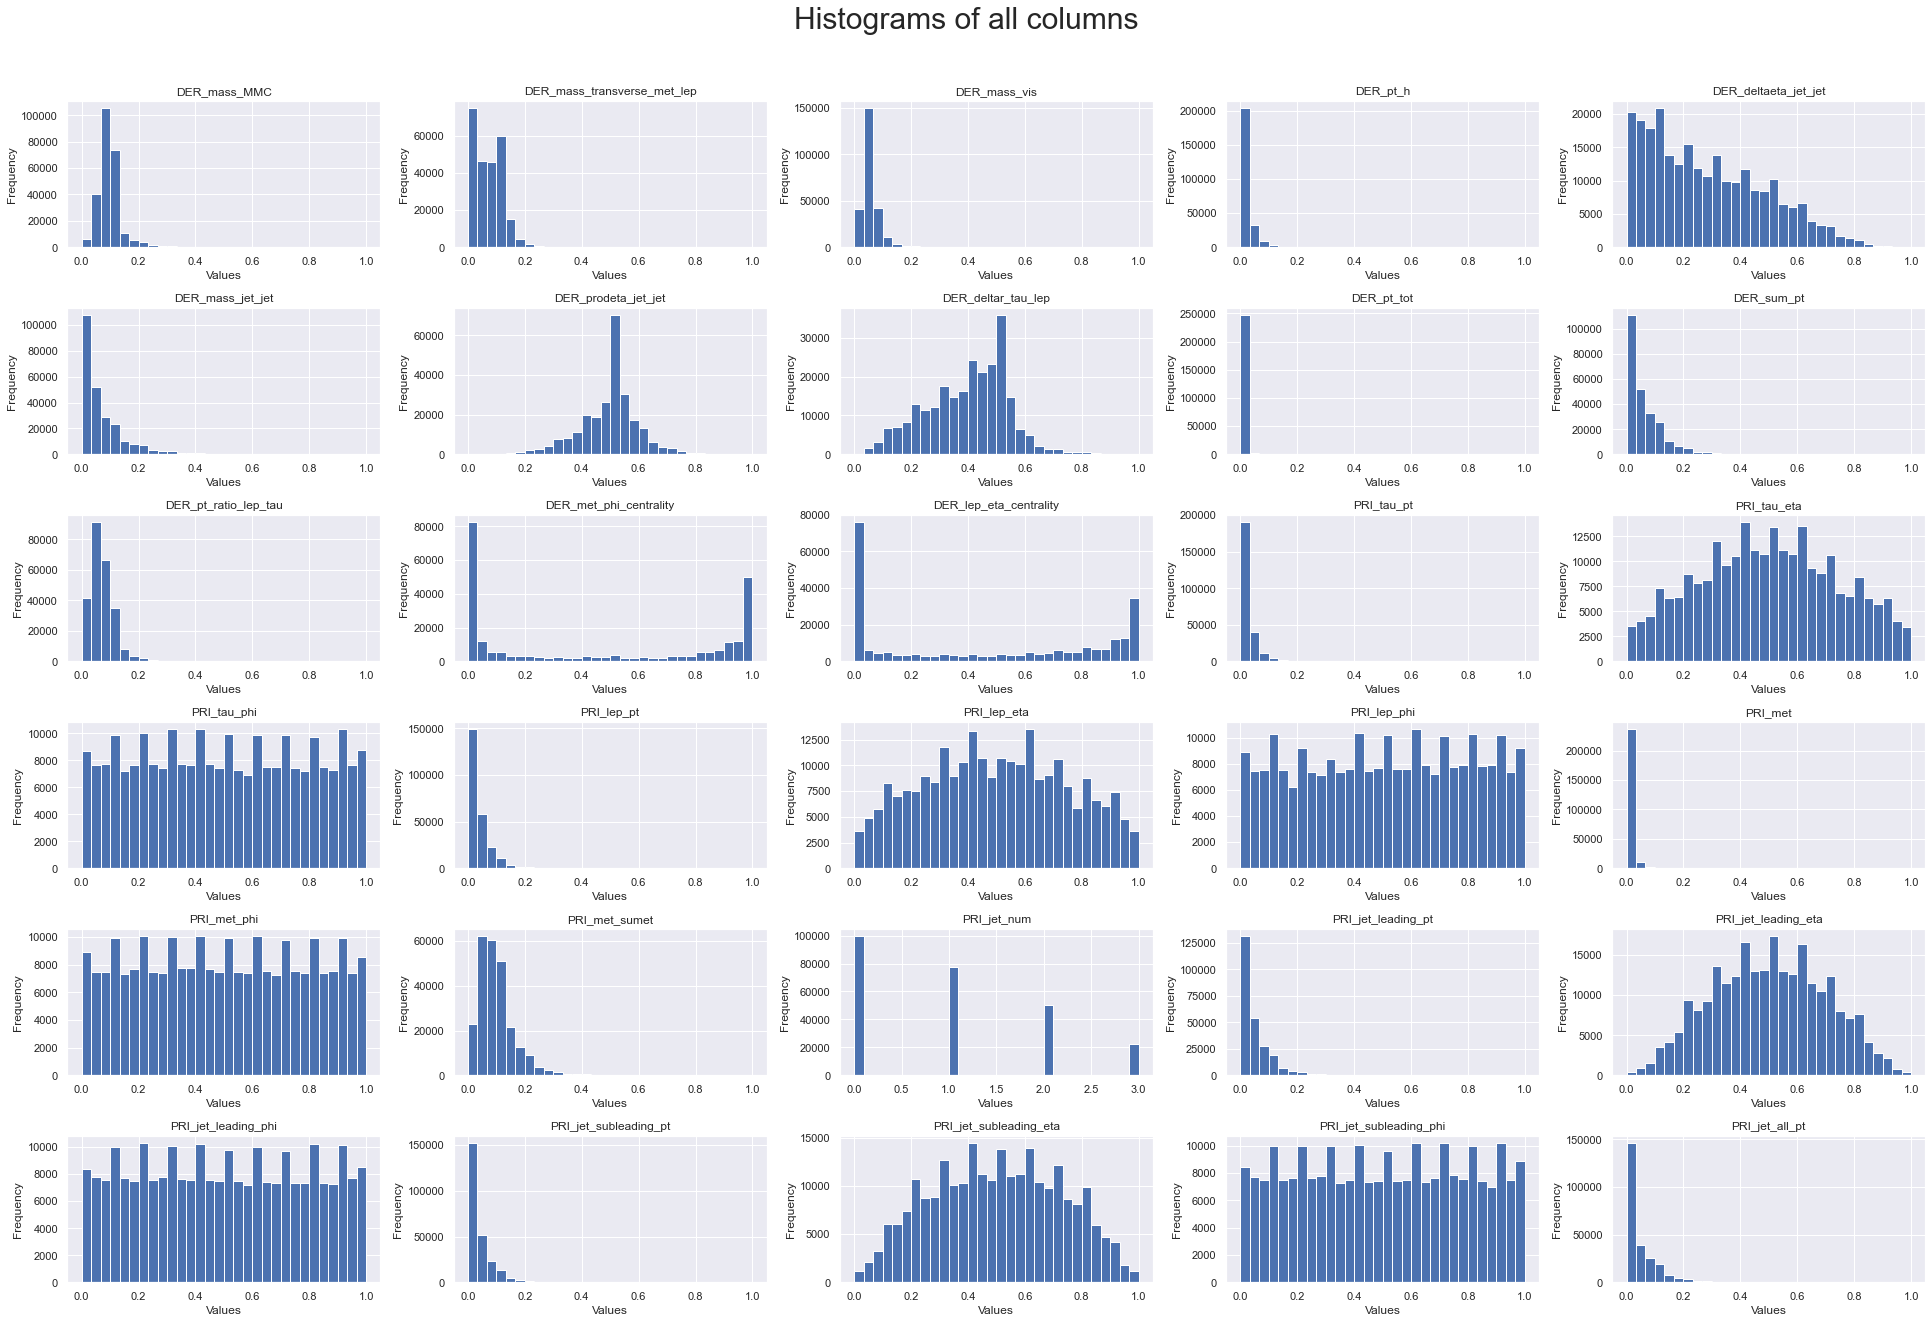

In [20]:
# show histograms of features
a = df_train_new.drop('Label', axis = 1).hist(bins=30, figsize=(27,18))
plt.suptitle("Histograms of all columns", fontsize=30, y = 1.02)
for fig in a.flatten():
    fig.set_xlabel('Values')
    fig.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

* <b> Plotting the co-relation matrix:

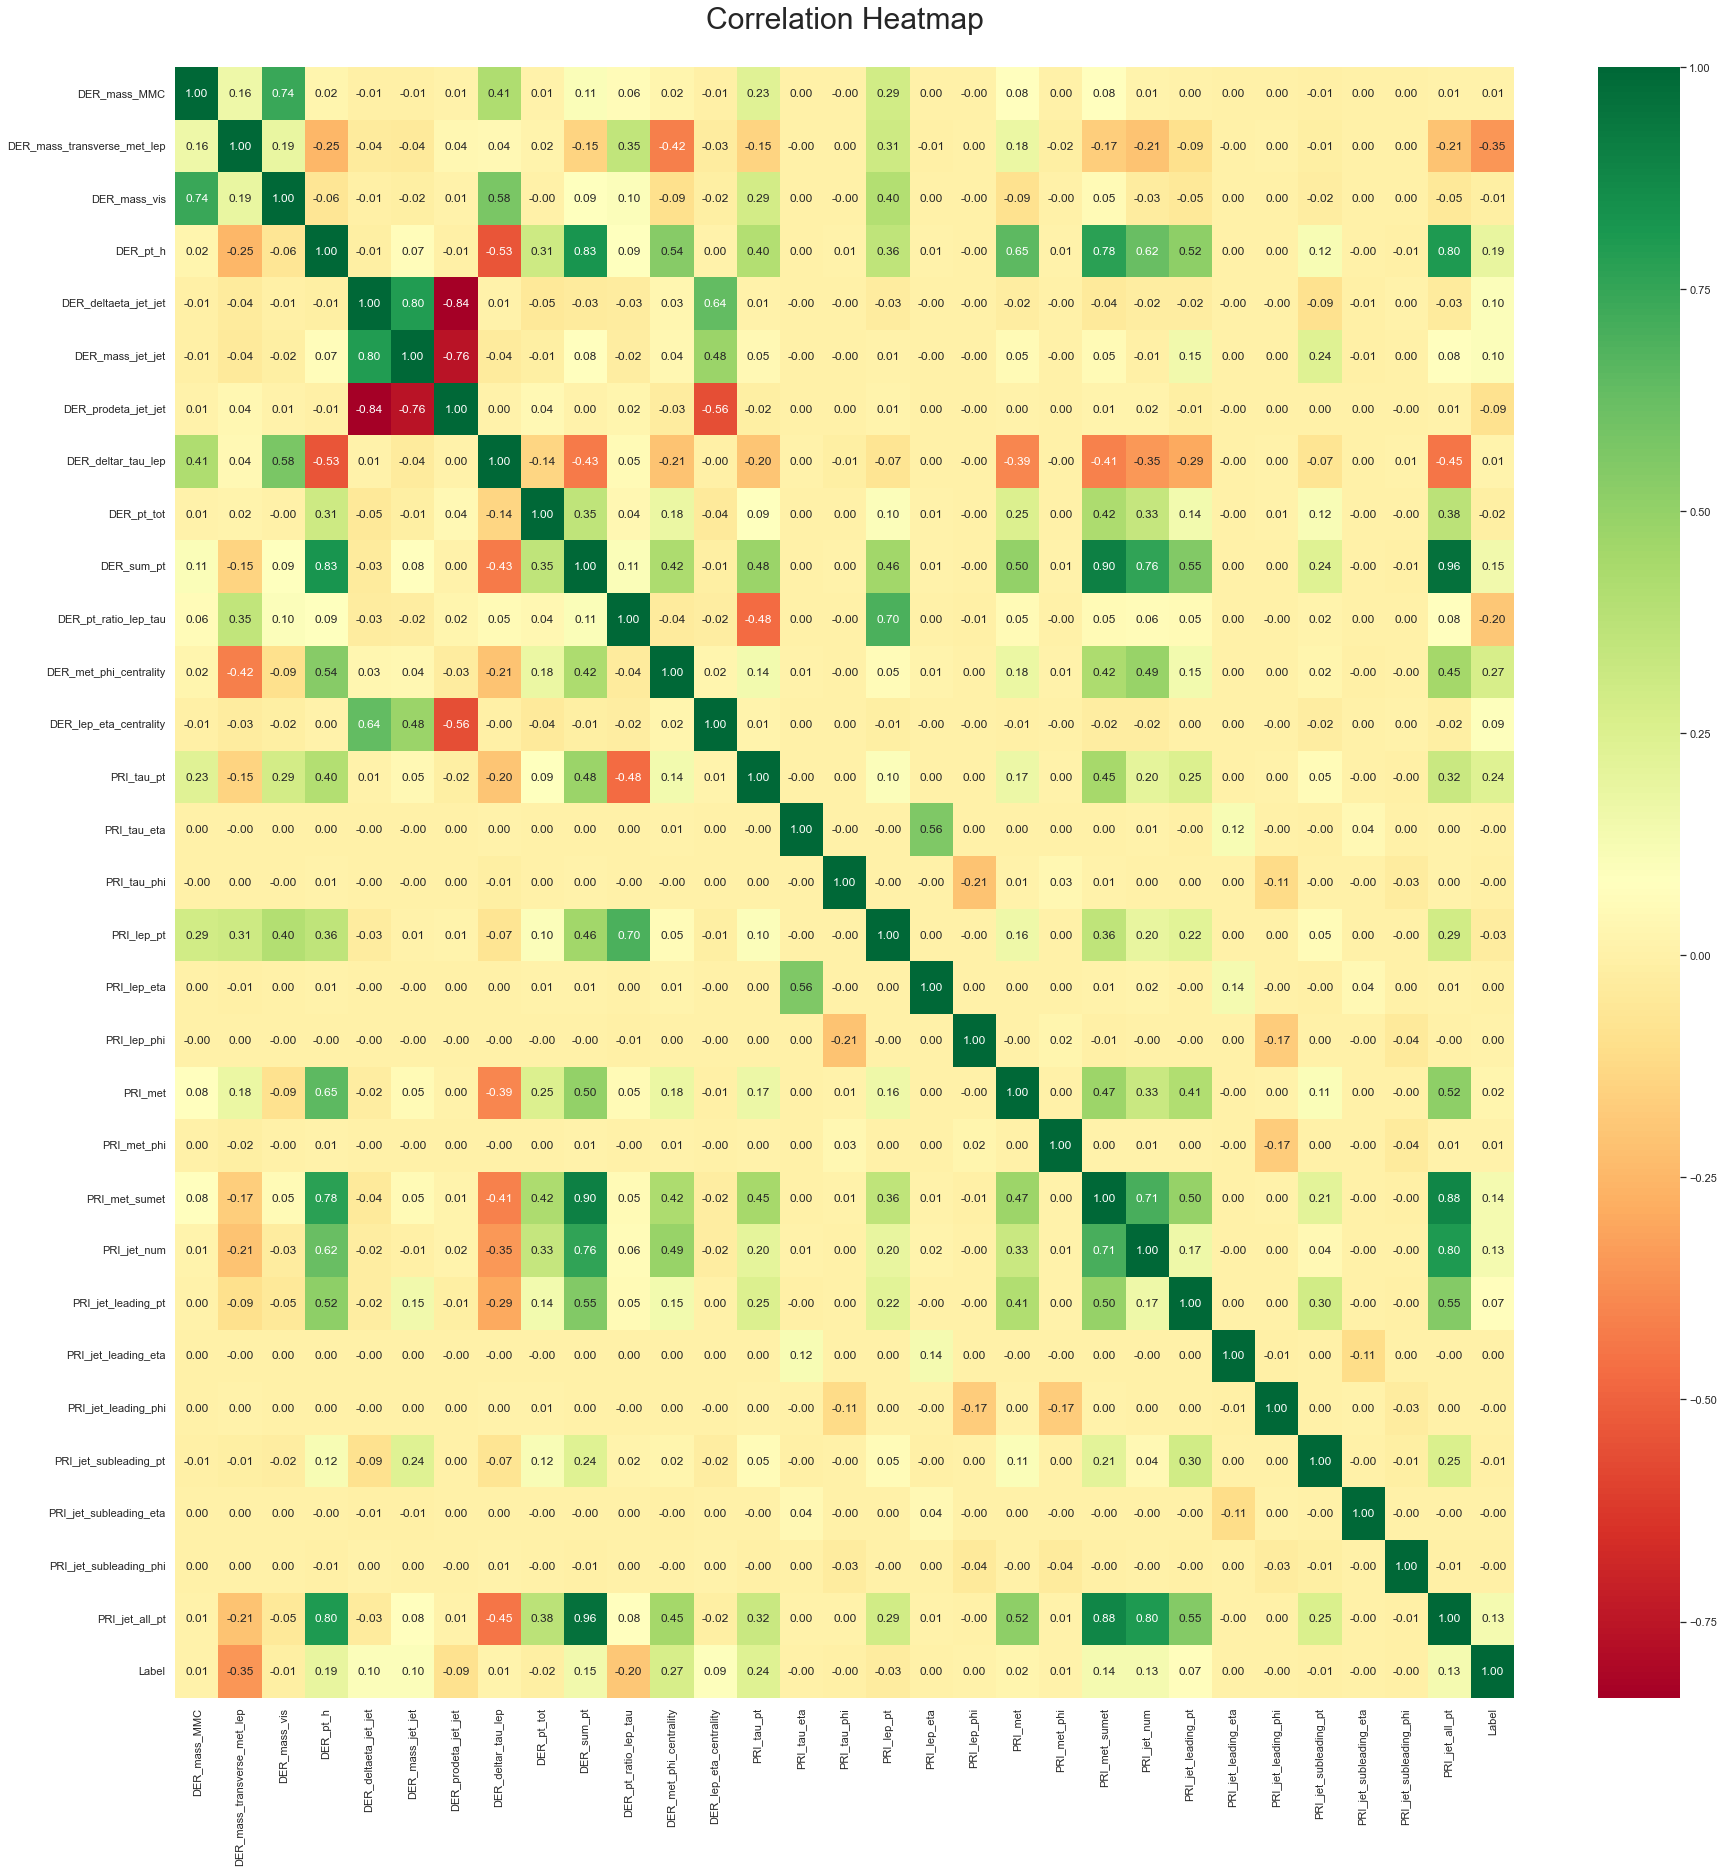

In [21]:
# Plotting the heat map of correlation matrix using seaborn :
plt.figure(figsize= (30,30))
sns.heatmap(df_train_new.corr(), annot = True, cmap='RdYlGn', fmt='.2f')
plt.title("Correlation Heatmap\n", fontsize=30)
plt.show()

<b> Observation:  From this correlation matrix, we can observe that several primitive and derived variables are highly correlated (for example DER_sum_pt with PRI_jet_all_pt (0.97)). As some variables are derived from others this is expected. There are also high correlations between primitive variables (ex. PRI_met_sumet with PRI_jet_all_pt (0.88))

We can filterout the significant features affecting our Response Variable (Threshold > 0.1 for positive and < -0.1 for negative): 

Features affecting our Response variables are:
 
 DER_mass_transverse_met_lep, DER_pt_h , DER_sum_pt , DER_met_phi_centrality , PRI_tau_pt , PRI_met_sumet , PRI_jet_num, PRI_jet_all_pt.

However, it must be noted that the correlation matrix only looks for positive and negative correlation which is linear. That's not the only kind of correlation that exists.


* #### <b> Constructing barplot and donutplot of our dataframe columns 

In [22]:
# Function to construct barplot and donutplot of a dataframe column
def bar_donut(df, col, h = 500, w = 800):
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'xy'}, {'type': 'domain'}]])
    x_val, y_val = df[col].value_counts(sort = False).index.tolist(), df[col].value_counts(sort = False).tolist()
    fig.add_trace(go.Bar(x = x_val, y = y_val, text = y_val, textposition = 'auto'), row = 1, col = 1)
    fig.add_trace(go.Pie(values = y_val, labels = x_val, hole = 0.5, textinfo = 'label+percent', title = f"{col}"), row = 1, col = 2)
    fig.update_layout(height = h, width = w, showlegend = True, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1), title = dict(text = f"Frequency distribution of {col}", x = 0.5, y = 0.95)) 
    fig.show()

In [23]:
# Target variable
from plotly.subplots import make_subplots
import plotly.graph_objects as go
bar_donut(df_train_new, 'Label')

<b> Observation: From the above subplots we can say that most of the labels are background noises instead of actual signals. 

* #### <b> Comparison of Feature distribution for the training set and the test set.

First we check the distributions of the features for the training set and the test set. If we are to train our model on one set (the training set) and use it to make predictions on another (the test set), then it is desirable that the distributions corresponding to the two sets have similar structure.

C:\Users\skyya\AppData\Local\Temp\ipykernel_16852\3389812495.py:59: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



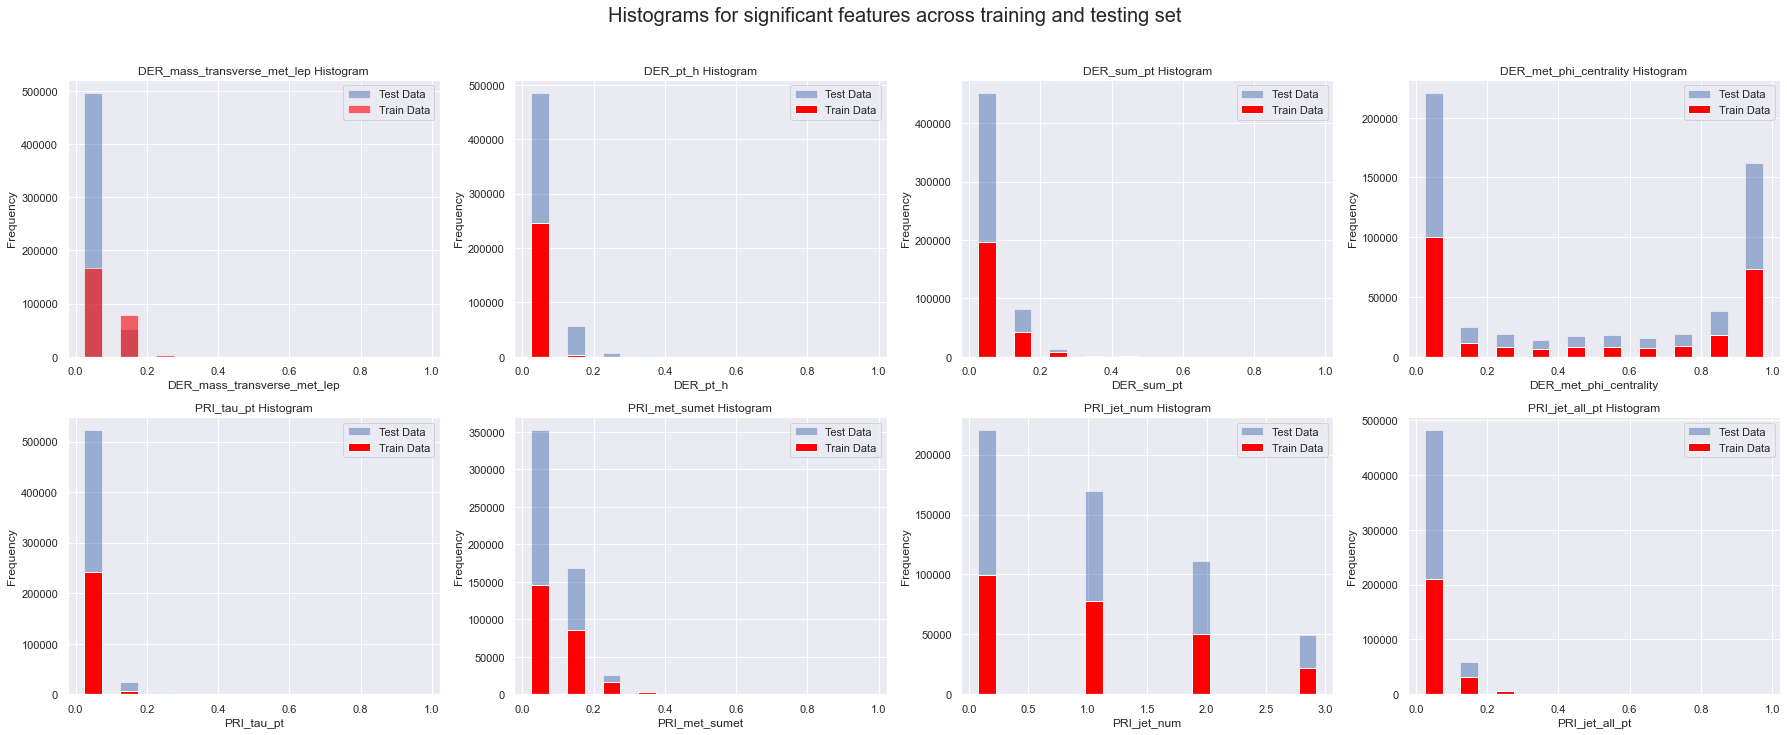

In [24]:
columns= ['DER_mass_transverse_met_lep', 'DER_pt_h' , 'DER_sum_pt' , 'DER_met_phi_centrality' , 'PRI_tau_pt' , 'PRI_met_sumet' , 'PRI_jet_num','PRI_jet_all_pt']

fig , ax = plt.subplots(2,4, figsize = (25,10))
fig.suptitle('Histograms for significant features across training and testing set', fontsize=20, y = 1.02)
ax[0][0].hist(df_test['DER_mass_transverse_met_lep'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][0].hist(df_train_new['DER_mass_transverse_met_lep'], label = 'Train Data', alpha = 0.6,rwidth= 0.5, color = 'RED')
ax[0][0].set_xlabel('DER_mass_transverse_met_lep'); ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title("DER_mass_transverse_met_lep Histogram")
ax[0][0].legend()


ax[0][1].hist(df_test['DER_pt_h'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][1].hist(df_train_new['DER_pt_h'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][1].set_xlabel('DER_pt_h'); ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title("DER_pt_h Histogram")
ax[0][1].legend()


ax[0][2].hist(df_test['DER_sum_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][2].hist(df_train_new['DER_sum_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][2].set_xlabel('DER_sum_pt'); ax[0][2].set_ylabel('Frequency')
ax[0][2].set_title("DER_sum_pt Histogram")
ax[0][2].legend()


ax[0][3].hist(df_test['DER_met_phi_centrality'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][3].hist(df_train_new['DER_met_phi_centrality'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][3].set_xlabel('DER_met_phi_centrality'); ax[0][3].set_ylabel('Frequency')
ax[0][3].set_title("DER_met_phi_centrality Histogram")
ax[0][3].legend()


ax[1][0].hist(df_test['PRI_tau_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][0].hist(df_train_new['PRI_tau_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][0].set_xlabel('PRI_tau_pt'); ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title("PRI_tau_pt Histogram")
ax[1][0].legend()

ax[1][1].hist(df_test['PRI_met_sumet'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][1].hist(df_train_new['PRI_met_sumet'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][1].set_xlabel('PRI_met_sumet'); ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title("PRI_met_sumet Histogram")
ax[1][1].legend()

ax[1][2].hist(df_test['PRI_jet_num'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][2].hist(df_train_new['PRI_jet_num'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][2].set_xlabel('PRI_jet_num'); ax[1][2].set_ylabel('Frequency')
ax[1][2].set_title("PRI_jet_num Histogram")
ax[1][2].legend()

ax[1][3].hist(df_test['PRI_jet_all_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][3].hist(df_train_new['PRI_jet_all_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][3].set_xlabel('PRI_jet_all_pt'); ax[1][3].set_ylabel('Frequency')
ax[1][3].set_title("PRI_jet_all_pt Histogram")
ax[1][3].legend()


fig.tight_layout()
fig.show()

<b> Observation:  we can observe that the distributions corresponding to the two sets have almost similar structure.

* #### <b> Comparison of feature distributions by target class  "b"  or  "s" in the training set

C:\Users\skyya\AppData\Local\Temp\ipykernel_16852\3110967779.py:58: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



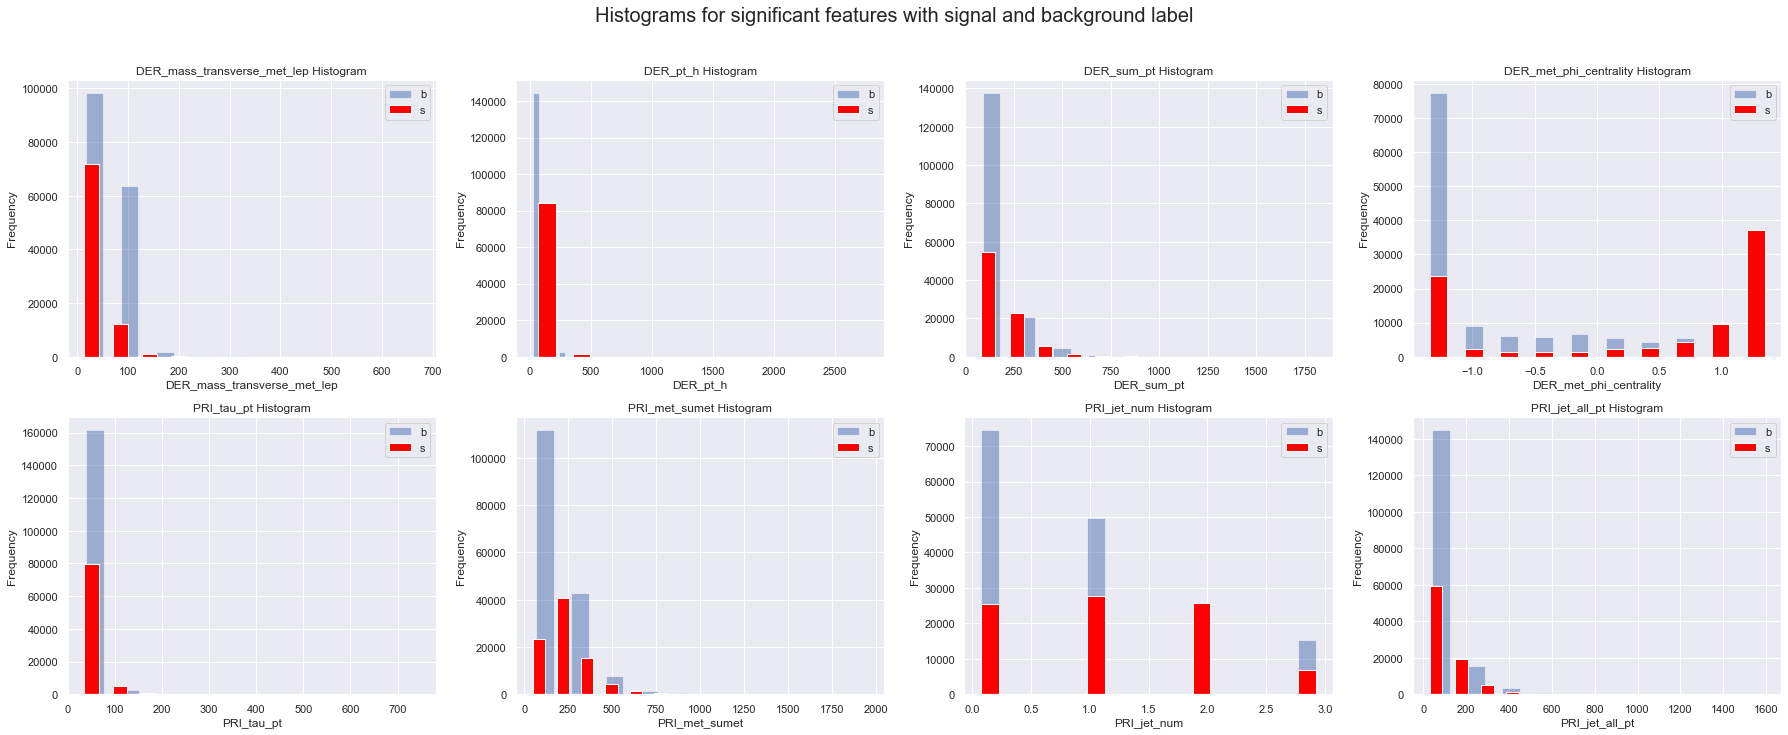

In [25]:
columns= ['DER_mass_transverse_met_lep', 'DER_pt_h' , 'DER_sum_pt' , 'DER_met_phi_centrality' , 'PRI_tau_pt' , 'PRI_met_sumet' , 'PRI_jet_num','PRI_jet_all_pt']
df_train_new_1 = pd.read_csv("training.csv") # Directly visualizing the original dataset
fig , ax = plt.subplots(2,4, figsize = (25,10))
fig.suptitle('Histograms for significant features with signal and background label', fontsize=20, y = 1.02)

ax[0][0].hist(df_train_new_1['DER_mass_transverse_met_lep'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][0].hist(df_train_new_1['DER_mass_transverse_met_lep'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5, color = 'RED')
ax[0][0].set_xlabel('DER_mass_transverse_met_lep'); ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title("DER_mass_transverse_met_lep Histogram")
ax[0][0].legend()

ax[0][1].hist(df_train_new_1['DER_pt_h'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5, rwidth= 0.5)
ax[0][1].hist(df_train_new_1['DER_pt_h'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1, rwidth= 0.5,color = 'RED')
ax[0][1].set_xlabel('DER_pt_h'); ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title("DER_pt_h Histogram")
ax[0][1].legend()


ax[0][2].hist(df_train_new_1['DER_sum_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][2].hist(df_train_new_1['DER_sum_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][2].set_xlabel('DER_sum_pt'); ax[0][2].set_ylabel('Frequency')
ax[0][2].set_title("DER_sum_pt Histogram")
ax[0][2].legend()


ax[0][3].hist(df_train_new_1['DER_met_phi_centrality'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][3].hist(df_train_new_1['DER_met_phi_centrality'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][3].set_xlabel('DER_met_phi_centrality'); ax[0][3].set_ylabel('Frequency')
ax[0][3].set_title("DER_met_phi_centrality Histogram")
ax[0][3].legend()


ax[1][0].hist(df_train_new_1['PRI_tau_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][0].hist(df_train_new_1['PRI_tau_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][0].set_xlabel('PRI_tau_pt'); ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title("PRI_tau_pt Histogram")
ax[1][0].legend()

ax[1][1].hist(df_train_new_1['PRI_met_sumet'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][1].hist(df_train_new_1['PRI_met_sumet'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][1].set_xlabel('PRI_met_sumet'); ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title("PRI_met_sumet Histogram")
ax[1][1].legend()

ax[1][2].hist(df_train_new_1['PRI_jet_num'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][2].hist(df_train_new_1['PRI_jet_num'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][2].set_xlabel('PRI_jet_num'); ax[1][2].set_ylabel('Frequency')
ax[1][2].set_title("PRI_jet_num Histogram")
ax[1][2].legend()

ax[1][3].hist(df_train_new_1['PRI_jet_all_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][3].hist(df_train_new_1['PRI_jet_all_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'RED')
ax[1][3].set_xlabel('PRI_jet_all_pt'); ax[1][3].set_ylabel('Frequency')
ax[1][3].set_title("PRI_jet_all_pt Histogram")
ax[1][3].legend()

fig.tight_layout()
fig.show()

<b> Observation : We compared the distributions of the features for the background events and the signal events in the training set. If a feature has reasonably different distributions corresponding to the background events and the signal events, then it is a clear indication that the feature is important in the task of classifying the events when the label is unknown. Similarly, if a feature has very similar distributions for the two target classes, then it is unlikely to help in the classification problem based on the feature alone. This, however, does not take into account the possible dependence the feature may have with other features which may turn out to be useful in the task of classification. To neglect the possiblilty of that, we will do our modeling on the whole dataset instead of signinficant features only.

* #### <b> Donutplots for Frequency comparison of 'Number of Jets'

In [26]:
# function to plot donutplots 
def donut(df1, df2, col,text1, text2, title_text = "Title"):
    fig = make_subplots(rows = 1, cols = 2, column_widths = [0.5, 0.5], row_heights = [0.5], specs = [[ {"type": "pie"}, {"type": "pie"}]])
    fig.add_trace(go.Pie(labels = df1[col].value_counts().index, values = df1[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text1)), row = 1, col = 1)
    fig.add_trace(go.Pie(labels = df2[col].value_counts().index, values = df2[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text2)), row = 1, col = 2)
    fig.update_layout(title = dict(text = title_text, y = 0.9, x = 0.5, xanchor = 'center', yanchor = 'top'))
    fig.show()

In [27]:
# Frequency comparison of PRI_jet_num for the training set and the test set
donut(df_train, df_test, col = 'PRI_jet_num', text1 = 'Train', text2 = 'Test', title_text = "Frequency comparison of PRI_jet_num for Train and Test dataset")

<b> Observation: The proportions of values of PRI_jet_num are more or less same for both the training set and the test set

In [28]:
# Frequency comparison of PRI_jet_num for the background events and the signal events in the training set
donut(df_train[df_train["Label"] == 0], df_train[df_train["Label"] == 1], col = 'PRI_jet_num', text1 = 'Background', text2 = 'Signal', title_text = "Frequency comparison of PRI_jet_num in the training set by target class")

<b> Observation: The proportions of values of PRI_jet_num, especially 0 and 2 , differ for the background events and the signal events in the training set.

* #### <b>  Correlation heatmap of float features for background events and signal events in the training set

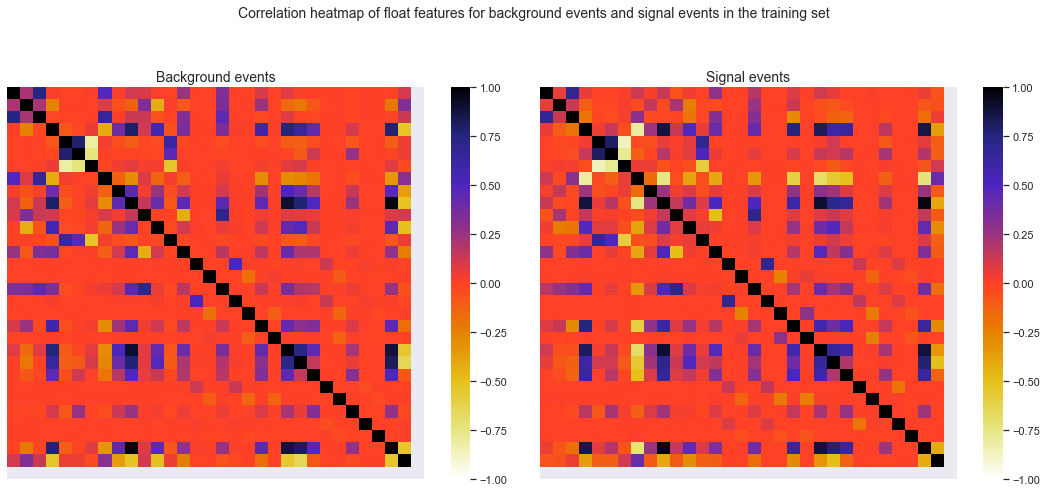

In [29]:
# Correlation heatmap of float features for background events and signal events in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5), sharex = True, sharey = True)
sns.heatmap(df_train[df_train["Label"] == 0].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[0])
sns.heatmap(df_train[df_train["Label"] == 1].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of float features for background events and signal events in the training set", fontsize = 14, y = 1.05)
plt.tight_layout()
plt.show()

<b> Observation: The two heatmaps are more or less similar, i.e. the overall correlation structure of the features corresponding to the background events and the signal events in the training set are very much alike.

# <b> Preparing the Predictors and Response Variable For different ML Algorithms:

In [30]:
# Assigning the predictor and Response Features / Variables
x = df_train.drop(["Label","Weight"],axis =1)
y = df_train["Label"]

In [31]:
# Train-Test Split from the training data: 
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.75, random_state= 44) 

# <b> Using Logistic regression for BaseLine Model

In [32]:
# Inicialization of Logistic REgression
log_re= LogisticRegression (max_iter= 500)
log_re.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [33]:
# Predicting on the test set:
y_pred_logre = log_re.predict(x_test)

In [34]:
# Calculating the accuracy score: 
acc_logre = accuracy_score(y_pred_logre, y_test)
print("The Accuracy Score  of the Logistic regression Model is :", acc_logre.round(decimals = 2)*100,"%")

The Accuracy Score  of the Logistic regression Model is : 74.0 %


In [35]:
# Cakculating the f1 Score : 
f1_logre = f1_score(y_pred_logre, y_test)
print(f"The  f1 score of the model is: {f1_logre.round(decimals = 2)*100}%")

The  f1 score of the model is: 56.99999999999999%


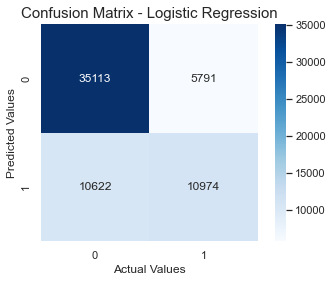

In [36]:
# Plotting the confusion matrix using Seaborn SNS: 
sns.heatmap(confusion_matrix(y_test,y_pred_logre), square=True, annot=True, fmt='d', cmap = "Blues")
plt.title("Confusion Matrix - Logistic Regression", fontsize =15)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [37]:
# Getting the classificaation report : 

report_logre = classification_report(y_test,y_pred_logre, target_names = ['b','s'])
print(report_logre)

              precision    recall  f1-score   support

           b       0.77      0.86      0.81     40904
           s       0.65      0.51      0.57     21596

    accuracy                           0.74     62500
   macro avg       0.71      0.68      0.69     62500
weighted avg       0.73      0.74      0.73     62500



# <b> INITIALIZING THE DECISION TREE MODEL : 


<b> Trying to get the best possible degree for the model

In [38]:
# DECISION TREE MODEL: (To get the best possible degree)
degree = np.arange(1,51)
f1_list = []
acc_list= []
# Import Decision Tree Classifier: 
from sklearn.tree import DecisionTreeClassifier

for i in degree: 
    dct = DecisionTreeClassifier(max_depth = i)
    dct.fit(x_train,y_train)

    #  Predicting on the validation set;
    y_pred_dct = dct.predict(x_test)

    # Getting the accuracy score: 
    acc_dct = round(accuracy_score(y_pred_dct, y_test),4)
    acc_list.append(acc_dct)

    # CAlculating the F1 score: 
    F1_score_dct = f1_score(y_test,y_pred_dct)
    f1_list.append(F1_score_dct)



In [39]:
# Fetching the best depth corrosponds to best f1 value fromt the F1_list.
best_depth_f1 = degree[np.argmax(f1_list)]
print (f"The best degree corrosponds to the best f1 score: {best_depth_f1}")

The best degree corrosponds to the best f1 score: 11


In [40]:
# Initializing the Decision Tree Model With max_depth as 11
dct = DecisionTreeClassifier(max_depth = best_depth_f1)
dct.fit(x_train, y_train)

# Predicting on the validation set: 
y_pred_dct = dct.predict(x_test)

In [41]:
# Calculating the accuracy score: 
acc_dct = accuracy_score(y_pred_dct, y_test)
print("The Accuracy Score  of the Decision Tree Model is :", acc_dct.round(decimals = 2)*100,"%")

The Accuracy Score  of the Decision Tree Model is : 82.0 %


In [42]:
# Cakculating the f1 Score : 
f1_dct = f1_score(y_pred_dct, y_test)
print(f"The  f1 score of the model is: {f1_dct.round(decimals = 2)*100}%")

The  f1 score of the model is: 73.0%


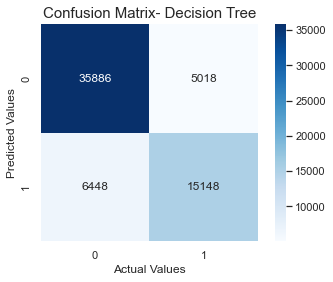

In [43]:
# Plotting the confusion matrix using Seaborn SNS: 
sns.heatmap(confusion_matrix(y_test,y_pred_dct), square=True, annot=True, fmt='d', cmap = "Blues")
plt.title("Confusion Matrix- Decision Tree", fontsize =15)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [44]:
# Getting the classificaation report : 

report_dct = classification_report(y_test,y_pred_dct, target_names = ['b','s'])
print(report_dct)

              precision    recall  f1-score   support

           b       0.85      0.88      0.86     40904
           s       0.75      0.70      0.73     21596

    accuracy                           0.82     62500
   macro avg       0.80      0.79      0.79     62500
weighted avg       0.81      0.82      0.81     62500



<b> Visualizing the DECISION TREE:

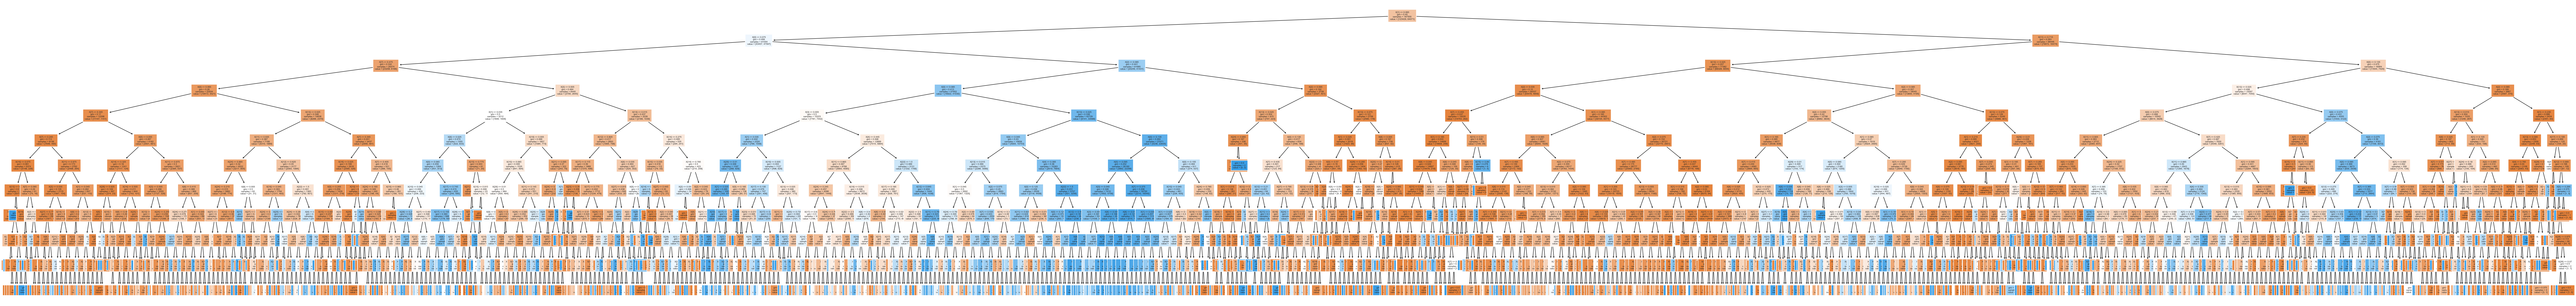

In [45]:
from sklearn import tree

# Code to set the size of the plot
plt.figure(figsize=(100,12), dpi = 150)

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dct, filled = True, fontsize = 5)


plt.show();

# <b> INITIALIZING ENSEMBLE MODEL: RANDOM FOREST

<b> We are going to balance the class imbalance in each bootstrap: 

In [46]:
# Set the maximum depth to be 11 (calculated in above step) and use 10 estimators and random state as 44
# Use class_weight as balanced_subsample to weigh the class accordingly
forest = RandomForestClassifier(n_estimators =10, max_depth = 11 , class_weight = 'balanced_subsample', random_state =44)

# Fitting the model:
forest.fit(x_train,y_train)

# Gettin the Predictions: 
y_pred_forest = forest.predict(x_test)

In [47]:
# Calculating the accuracy score: 
acc_forest = accuracy_score(y_pred_forest, y_test)
print("The Accuracy Score  of the Decision Tree Model is :", acc_forest.round(decimals = 2)*100,"%")

The Accuracy Score  of the Decision Tree Model is : 81.0 %


In [48]:
# Cakculating the f1 Score : 
f1_forest = f1_score(y_pred_forest, y_test)
print(f"The  f1 score of the model is: {f1_forest.round(decimals = 2)*100}%")

The  f1 score of the model is: 75.0%


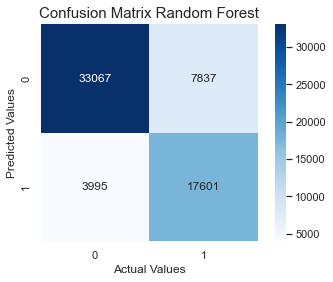

In [49]:
# Plotting the confusion matrix using Seaborn SNS: 
sns.heatmap(confusion_matrix(y_test,y_pred_forest), square=True, annot=True, fmt='d', cmap = "Blues")
plt.title("Confusion Matrix Random Forest", fontsize =15)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [50]:
# Getting the classificaation report : 

report_forest = classification_report(y_test,y_pred_forest, target_names = ['b','s'])
print(report_forest)

              precision    recall  f1-score   support

           b       0.89      0.81      0.85     40904
           s       0.69      0.82      0.75     21596

    accuracy                           0.81     62500
   macro avg       0.79      0.81      0.80     62500
weighted avg       0.82      0.81      0.81     62500



We train a random forest to get a scores of features importances.

For each decision tree, the importance of a feature importance is computed as the (normalized) total reduction of the Gini criterion brought by that feature. It is also known as the Gini importance. It follows that the importances of features for the random forest are the mean of those importances for each tree.

For permutation importance, the features are permuted and their effect on accuracy is calculated using the test/validation set. Most important features reduce the accuracy most when permuted.

Feature ranking:


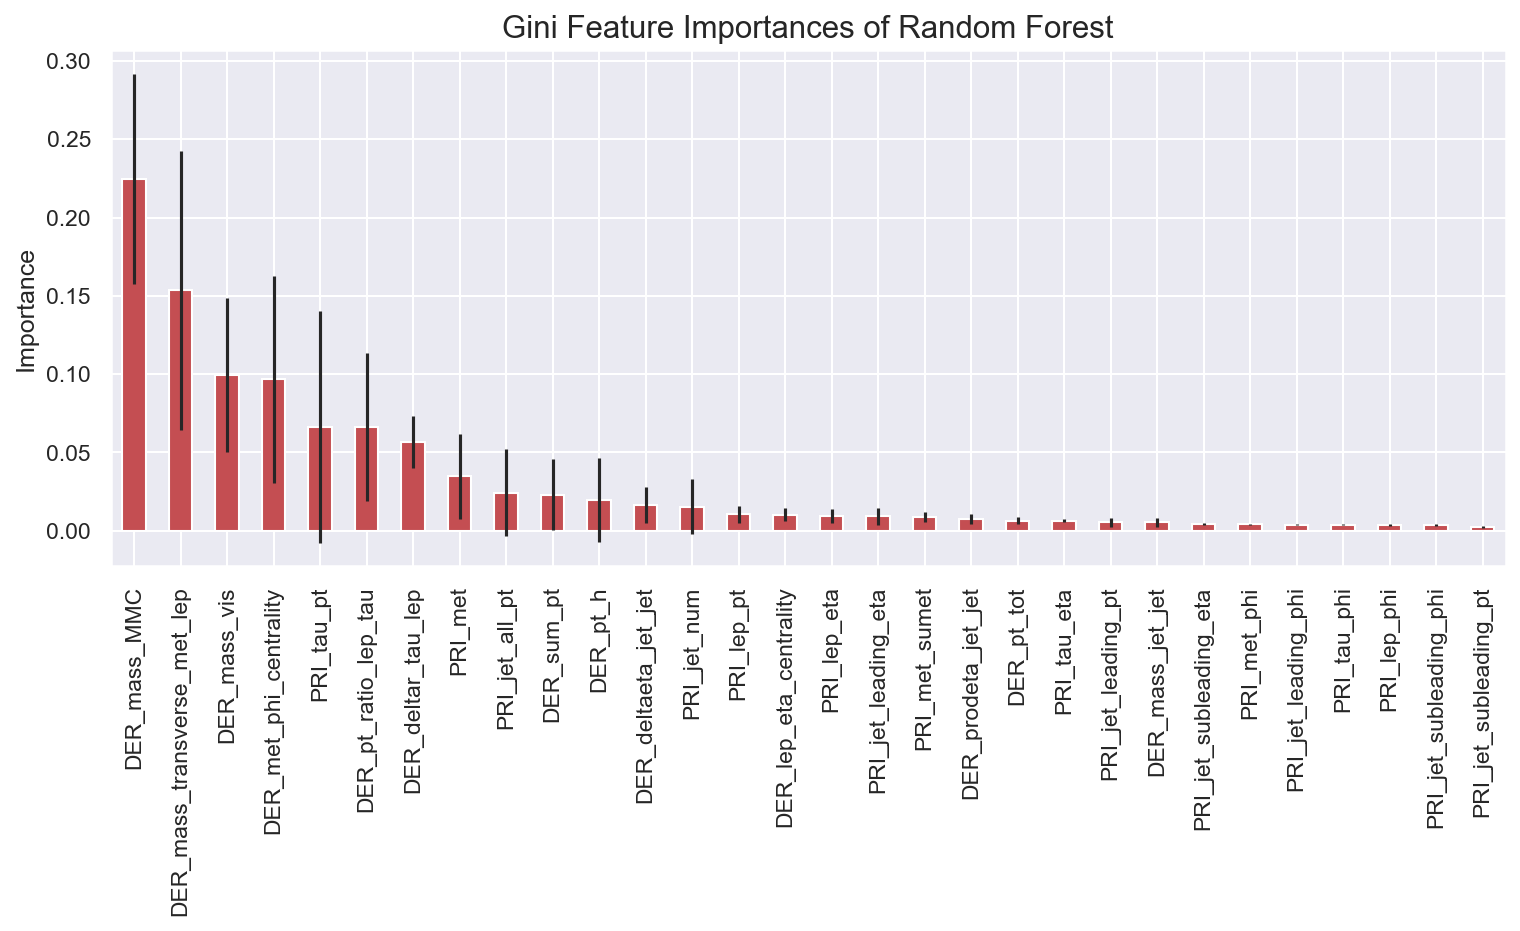

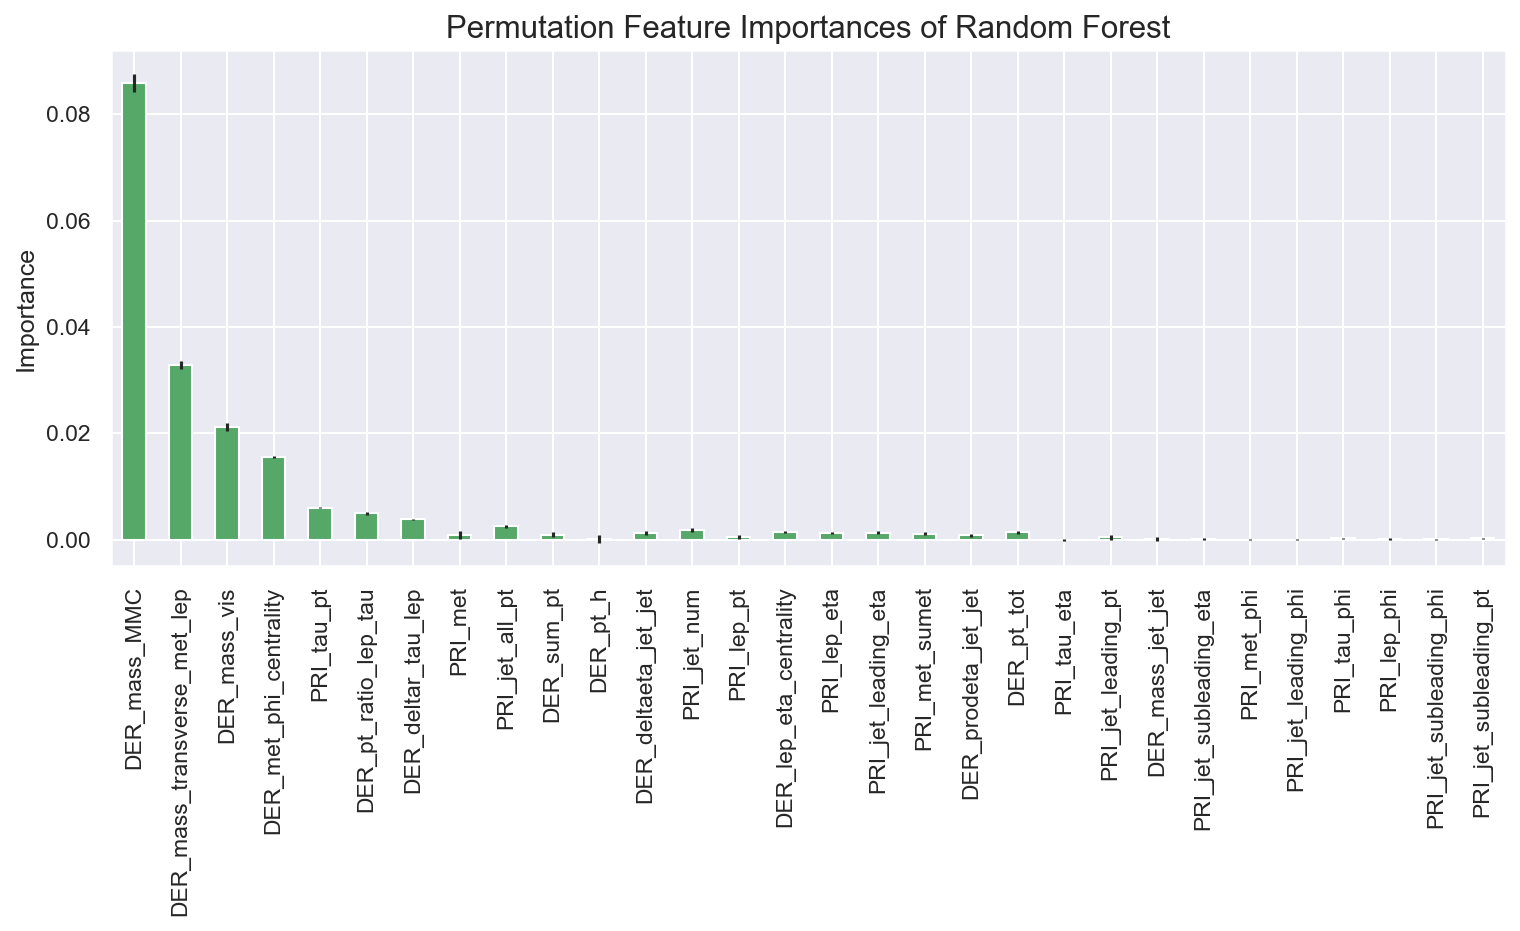

In [51]:
# Analysis of feature importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)[indices]

permut_imp = permutation_importance(forest, x_test, y_test)
# Print the feature ranking
print("Feature ranking:")
importances = pd.Series(forest.feature_importances_, index=x_train.columns)[indices]
permut_importances = pd.Series(permut_imp.importances_mean, index=x_train.columns)[indices]

# Plot the feature importances of the forest
plt.figure(figsize=(12,8), dpi = 150)
plt.title("Gini Feature Importances of Random Forest", fontsize=15)
plt.ylabel('Importance')

importances.plot.bar(yerr=std, color='r', label = 'Gini')
plt.gcf().subplots_adjust(bottom=0.45)

plt.show()

plt.figure(figsize=(12,8), dpi = 150)
plt.title("Permutation Feature Importances of Random Forest", fontsize=15)
plt.ylabel('Importance')

permut_importances.plot.bar(yerr=permut_imp.importances_std, color = 'g', label = 'Permutation')
# plt.legend(loc = 'best')
plt.gcf().subplots_adjust(bottom=0.45)

plt.show()


**It can be observed** that except for PRI_met_sumet, all features which were found to be significant according to the correlation heatmat (|correlation| > 0.1) i.e. DER_mass_transverse_met_lep, DER_pt_h, DER_sum_pt, DER_met_phi_centrality, PRI_tau_pt,  PRI_jet_num, PRI_jet_all_pt. are in the top 10 according to the Gini importance.

Also seen is the fact that both importances are very much alike in terms of ordering but permutation importance is more computationally intensive and not as biased for numerical features or those with high cardinality (most features.)

**Interestingly**, DER_mass_MMC which shows very high importance in both cases is not significant according to the heatmap. This could be because correlation heatmap only looks at linear and inverse correlation, none of which HAVE to be the case for an important feature.


# <b> Plotting ROC Curve and Calculating roc_auc_score 

In [52]:
# Calculating ROC_AUC score

#use models to predict probability that given y value as 1
y_proba_logre = log_re.predict_proba(x_test)[:,1] # from Logistic Regression
y_proba_dct = dct.predict_proba(x_test)[:,1] # From decision tree
y_proba_forest = forest.predict_proba(x_test)[:,1]

# Using these Probability predictions to calculate Area under Curve (auc) score:
auc_logre = roc_auc_score(y_test, y_proba_logre)
auc_dct = roc_auc_score(y_test, y_proba_dct)
auc_forest = roc_auc_score(y_test, y_proba_forest)


In [53]:
print(f'''

The AUC_ score from the Logistic Regression Model : {auc_logre:.2f}
The AUC_ score from the Decision Tree Model : {auc_dct:.2f}
The AUC_ score from the Random Forest Model : {auc_forest:.2f}


''')



The AUC_ score from the Logistic Regression Model : 0.80
The AUC_ score from the Decision Tree Model : 0.88
The AUC_ score from the Random Forest Model : 0.89





#### <b>Plotting ROC Curve

In [54]:
# Defining the function to plot ROC plot
# plot_roc(y_test,y_prob_logre,y_prob_dct, y_prob_forest, ax)
def plot_roc(y_test,y_prob_logre,y_prob_dct, y_prob_forest, ax):

    # GEtting False Posotive Rate and True Positive Rate for all the models.
    logre_fpr, logre_tpr, logre_thresholds = roc_curve(y_test, y_proba_logre)
    dct_fpr, dct_tpr, dct_thresholds = roc_curve(y_test, y_proba_dct)
    forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_test, y_proba_forest)

    # Calculating Area under roc curve for all the models: 
    auc_logre = metrics.auc(logre_fpr,logre_tpr)
    auc_dct = metrics.auc(dct_fpr,dct_tpr)
    auc_forest = metrics.auc(forest_fpr,forest_tpr)

    ax.plot(logre_fpr, logre_tpr, label=f'Logistic Regression (Area : {auc_logre:.4f}) ', color = 'Red')
    ax.plot(dct_fpr, dct_tpr, label=f'Decision Tree Classifier (Area : {auc_dct:.4f})', color = 'Blue')
    ax.plot(forest_fpr, forest_tpr, label=f'Random Forest Classifier (Area : {auc_forest:.4f})', color = 'Green')   

    # ax.plot([0, 1], [0, 1],'r--')

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    ax.legend(loc="lower right")


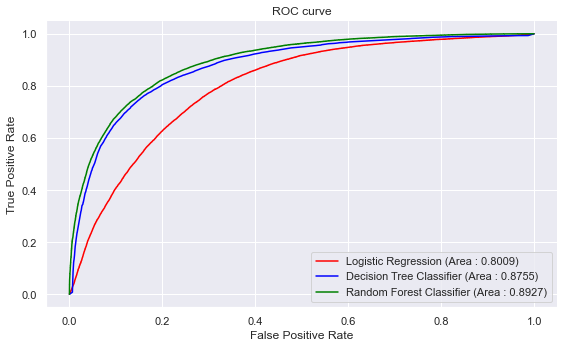

In [55]:
# your code here
import sklearn.metrics as metrics
#ROC Curve values
# plt.style.use('seaborn-white')
# plt.xkcd(randomness=0,scale=0.1)

fig, ax = plt.subplots(figsize = (8,5))
# fig.patch.set_facecolor('None')
# fig.patch.set_alpha(0)

# plot_roc(y_test,y_prob_logre,y_prob_dct, y_prob_forest, ax)
plot_roc(y_test,y_proba_logre,y_proba_dct, y_proba_forest, ax)
[ax.spines[key].set_visible(False) for key in ax.spines.keys() if key not in ['bottom','left']];
# ax.patch.set_facecolor('None')
# ax.patch.set_alpha(0)
plt.tight_layout()

# <b> CONCLUSION:

<b> Summarize everything we have gathered so far for all three models in Table format:

In [56]:
#Importing PrettyTable
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
table = PrettyTable(["Metric/Parameter","Logistic Regression","Decision Tree", "Random Forest"])

#Adding Rows

table.add_row(['Accuracy Score',round(acc_logre,2),round(acc_dct,2),round(acc_forest,2)])
table.add_row(['F1 Score',round(f1_logre,2),round(f1_dct,2),round(f1_forest,2)])
table.add_row(['Area Under Curve',round(auc_logre,2),round(auc_dct,2),round(auc_forest,2)])

print(table)

+------------------+---------------------+---------------+---------------+
| Metric/Parameter | Logistic Regression | Decision Tree | Random Forest |
+------------------+---------------------+---------------+---------------+
|  Accuracy Score  |         0.74        |      0.82     |      0.81     |
|     F1 Score     |         0.57        |      0.73     |      0.75     |
| Area Under Curve |         0.8         |      0.88     |      0.89     |
+------------------+---------------------+---------------+---------------+


#### <b> From observing the table, we can make an argument that  'Random Forest'  is performing the best among all of the other models. 

#### Hence, we are finnaly going to use this model only to predict on our final TEST DATASET Given by the Kaggle Higgs -Boson Challenge.

# OUR TEST DATASET

In [57]:
df_test.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0          0.05                         0.08          0.01      0.00   
1          0.05                         0.07          0.06      0.04   
2          0.06                         0.06          0.07      0.00   
3          0.07                         0.03          0.07      0.01   
4          0.03                         0.09          0.04      0.07   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.15              0.11                 0.51   
1                  0.15              0.11                 0.51   
2                  0.15              0.11                 0.51   
3                  0.15              0.11                 0.51   
4                  0.15              0.11                 0.51   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_phi  \
0                0.12        0.00        0.00  ...         0.82   
1                0.33        0.00        0.04  ...         0.32   
2                0.46        0.01        0.03  ...         0.20   
3                0.47        0.01        0.02  ...         0.69   
4                0.14        0.10        0.33  ...         0.46   

   PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0           0.04            0                0.02                 0.44   
1           0.07            1                0.02                 0.44   
2           0.04            0                0.20                 0.39   
3           0.07            0                0.20                 0.39   
4           0.39            3                0.20                 0.39   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                 0.36                    0.2                    0.54   
1                 0.36                    0.2                    0.54   
2                 0.45                    0.2                    0.54   
3                 0.45                    0.2                    0.54   
4                 0.45                    0.2                    0.54   

   PRI_jet_subleading_phi  PRI_jet_all_pt  
0                    0.91            0.00  
1                    0.91            0.03  
2                    0.91            0.00  
3                    0.91            0.00  
4                    0.91            0.32  

[5 rows x 30 columns]

In [58]:
df_test.fillna(method = 'ffill', inplace = True)

In [59]:
# Using Trained Random Forest Model to predict on the final dataset:

x_final_test = df_test

y_final_prediction = forest.predict(x_final_test)

In [60]:
# Creating a submission dataframe: 
df_cols = ['EventId','RankOrder', 'Label']

df_submission = pd.DataFrame(columns = df_cols)
df_submission.EventId = np.arange(350000, 900000)
df_submission.Label = y_final_prediction
df_submission.RankOrder = np.arange(1,550001)

#### <b> The dataset to submit for the Kaggle Higgs- Boson Challenge

In [61]:

df_submission.head()

EventId  RankOrder  Label
0   350000          1    0.0
1   350001          2    0.0
2   350002          3    0.0
3   350003          4    0.0
4   350004          5    0.0

<b> We need to change Lables as 0 = b and 1 = s

In [66]:
# Updating the Labels
df_submission['Label'][df_submission.Label == 0.0] ='b'
df_submission['Label'][df_submission.Label == 1.0] ='s'

In [63]:
# Final dataset to submit

print("Final Submission Dataset")
df_submission.head(20)


Final Submission Dataset


EventId  RankOrder Label
0    350000          1     b
1    350001          2     b
2    350002          3     b
3    350003          4     b
4    350004          5     b
5    350005          6     b
6    350006          7     b
7    350007          8     b
8    350008          9     b
9    350009         10     b
10   350010         11     b
11   350011         12     b
12   350012         13     s
13   350013         14     b
14   350014         15     b
15   350015         16     b
16   350016         17     b
17   350017         18     b
18   350018         19     b
19   350019         20     s

In [64]:
# Checking if there is our model predicted 1 and 0 both or not. 
Counter(df_submission['Label'])

Counter({'b': 473000, 's': 77000})

In [65]:
# saving the dataframe to the local disk
df_submission.to_csv('submission.csv', index=False)

<b> Finally, we can submit this dataframe to the kaggle site. As we have no way to check the model performance on the test dataset.

# <b> Conclusions

* As far as accuracy score is concerned, Decision Tree is performing the best, but due to class imbalance, we are not going to use the accuracy score as our best performing model criteria. 
* Hence, F1_score and AUC score has been used to get the best performing model. 
* From the Table, we are concluding that Random forest is giving us the best score and AUC _score.
* This ROC Curve is giving us a clear picture of the best performing model which is the Random Forest Classifier with the highest F1_score and AUC_score.

